In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display
import os
import numpy as np
import sys 
sys.path.append('../modules')
import data
import eval
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import dummy
from sklearn import compose
from sklearn import multioutput
from sklearn import linear_model
from sklearn import ensemble
from sklearn import feature_selection
from sklearn import model_selection

pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [2]:
values = data.load_migration_rates_from_csv()
trends = data.load_trends_from_csv()
countries = data.get_countries()
keyword_ids = trends.columns.levels[0].tolist()


# panel = pd.concat([values, trends], axis='columns')
panel = values.join(trends, how="outer")
panel

# pd.concat(trends, axis=1).swaplevel(axis='columns')
# dataset = data.Dataset(values, trends)


# display(dataset.create_panel())


value                                                                                                          10                                                                                                                                      ...  59                                                                                                                                     60                                                                                                                                                                                 
country      AT   BE  BG  CH  CY  CZ  DK  EE  ES  FI  FR  GB  GR  HR  HU  IE  IT  LT  LU  LV  NL  PL  PT  RO  SE  SI  SK  AT   BE   BG     CH    CY   CZ   DK   EE     ES    FI     FR      GB    GR   HR   HU   IE     IT    LT   LU   LV     NL      PL    PT   ...  CY   CZ   DK   EE     ES    FI     FR      GB    GR   HR   HU   IE     IT    LT   LU   LV     NL      PL    PT   RO   SE   SI   SK     AT      BE      BG      CH    CY     CZ      DK    EE     ES    FI     FR      GB    GR   HR   HU     IE      IT    LT   LU   LV     NL      PL      PT      RO      SE    SI   SK 
date                                                                                                                                                                                                                                                              ...                                                                                                                                                                                                                                                                                                                            
2007-01-01  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0  0.0  0.0  12.286  0.0  0.0  0.0  0.0   8.286  0.0  41.857   7.857  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0   7.143   0.000  0.0  ...  0.0  0.0  0.0  0.0   0.000  0.0  37.571  19.571  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0  27.286   0.000  0.0  0.0  0.0  0.0  0.0  18.571  12.143   0.000  19.857  0.0  34.571  17.429  0.0  22.714  0.0  19.857  59.286  0.0  0.0  0.0  36.000  27.571  0.0  0.0  0.0   7.286  64.429  10.000   0.000  56.714  0.0  0.0
2007-02-01  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0  0.0  0.0   0.000  0.0  0.0  0.0  0.0  58.571  0.0  83.000  15.000  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0   0.000   0.000  0.0  ...  0.0  0.0  0.0  0.0   0.000  0.0  44.000  31.857  0.0  0.0  0.0  0.0  23.714  0.0  0.0  0.0   0.000   0.000  0.0  0.0  0.0  0.0  0.0   0.000  27.000   0.000   0.000  0.0   0.000   0.000  0.0  19.571  0.0   0.000  39.429  0.0  0.0  0.0   7.714  67.857  0.0  0.0  0.0   0.000   0.000   0.000  37.857  17.000  0.0  0.0
2007-03-01  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0  0.0  0.0   0.000  0.0  0.0  0.0  0.0  21.429  0.0  17.429  41.429  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0  72.000  28.571  0.0  ...  0.0  0.0  0.0  0.0  32.000  0.0  36.429  38.143  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0  51.571   0.000  0.0  0.0  0.0  0.0  0.0   0.000   0.000   0.000   0.000  0.0   0.000  14.286  0.0  45.143  0.0  25.000  23.714  0.0  0.0  0.0  16.000  31.429  0.0  0.0  0.0  19.857   9.429   0.000  35.857  26.000  0.0  0.0
2007-04-01  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0  0.0  0.0   0.000  0.0  0.0  0.0  0.0  45.714  0.0   0.000  14.143  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0  39.857   0.000  0.0  ...  0.0  0.0  0.0  0.0   0.000  0.0   0.000  15.714  0.0  0.0  0.0  0.0   0.000  0.0  0.0  0.0   0.000   0.000  0.0  0.0  0.0  0.0  0.0   0.000   0.000   0.000  20.429  0.0   0.000   9.571  0.0  28.143  0.0   0.000  55.714  0.0  0.0  0.0  51.571   0.000  0.0  0.0  0.0  10.429  54.000

## Models

naive: global mean

In [3]:
t_min = "2011-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

dataset_resampled = panel.resample("3M")
x = panel.drop(columns="value")[t_min:t_max]
y = panel["value"][t_min:t_max]

x_train = x[t_min:t_split_lower]
y_train = y[t_min:t_split_lower]
x_test = x[t_split_upper:t_max]
y_test = y[t_split_upper:t_max]

reg = dummy.DummyRegressor(strategy="mean")

reg.fit(x_train, y_train)

cv_score = eval.score_cv(reg, x_train, y_train)
test_score = eval.score_test(reg, x_test, y_test)

print("Mean CV score:")
display(cv_score.mean())

print("OOS score:")
display(test_score)

y_pred_all = reg.predict(x)

fig, axs = eval.plot_prediction(y_pred_all, panel)


Mean CV score:


/home/stei509/anaconda3/envs/eumf/lib/python3.9/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


fit_time                   2.059e-03
score_time                 5.119e-03
test_mae                  -6.497e+02
test_rmse                 -7.662e+02
test_explained_variance   -4.405e-17
test_r2                   -1.478e+00
dtype: float64

OOS score:


mae                  -6.407e+02
rmse                 -7.489e+02
explained_variance    2.286e-16
r2                   -2.034e+00
dtype: float64

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

naive: transformed mean

Mean CV score:


fit_time                     0.012
score_time                   0.012
test_mae                  -291.608
test_rmse                 -338.502
test_explained_variance      0.000
test_r2                     -2.722
dtype: float64

OOS score:


mae                  -160.181
rmse                 -193.825
explained_variance      0.000
r2                     -0.577
dtype: float64

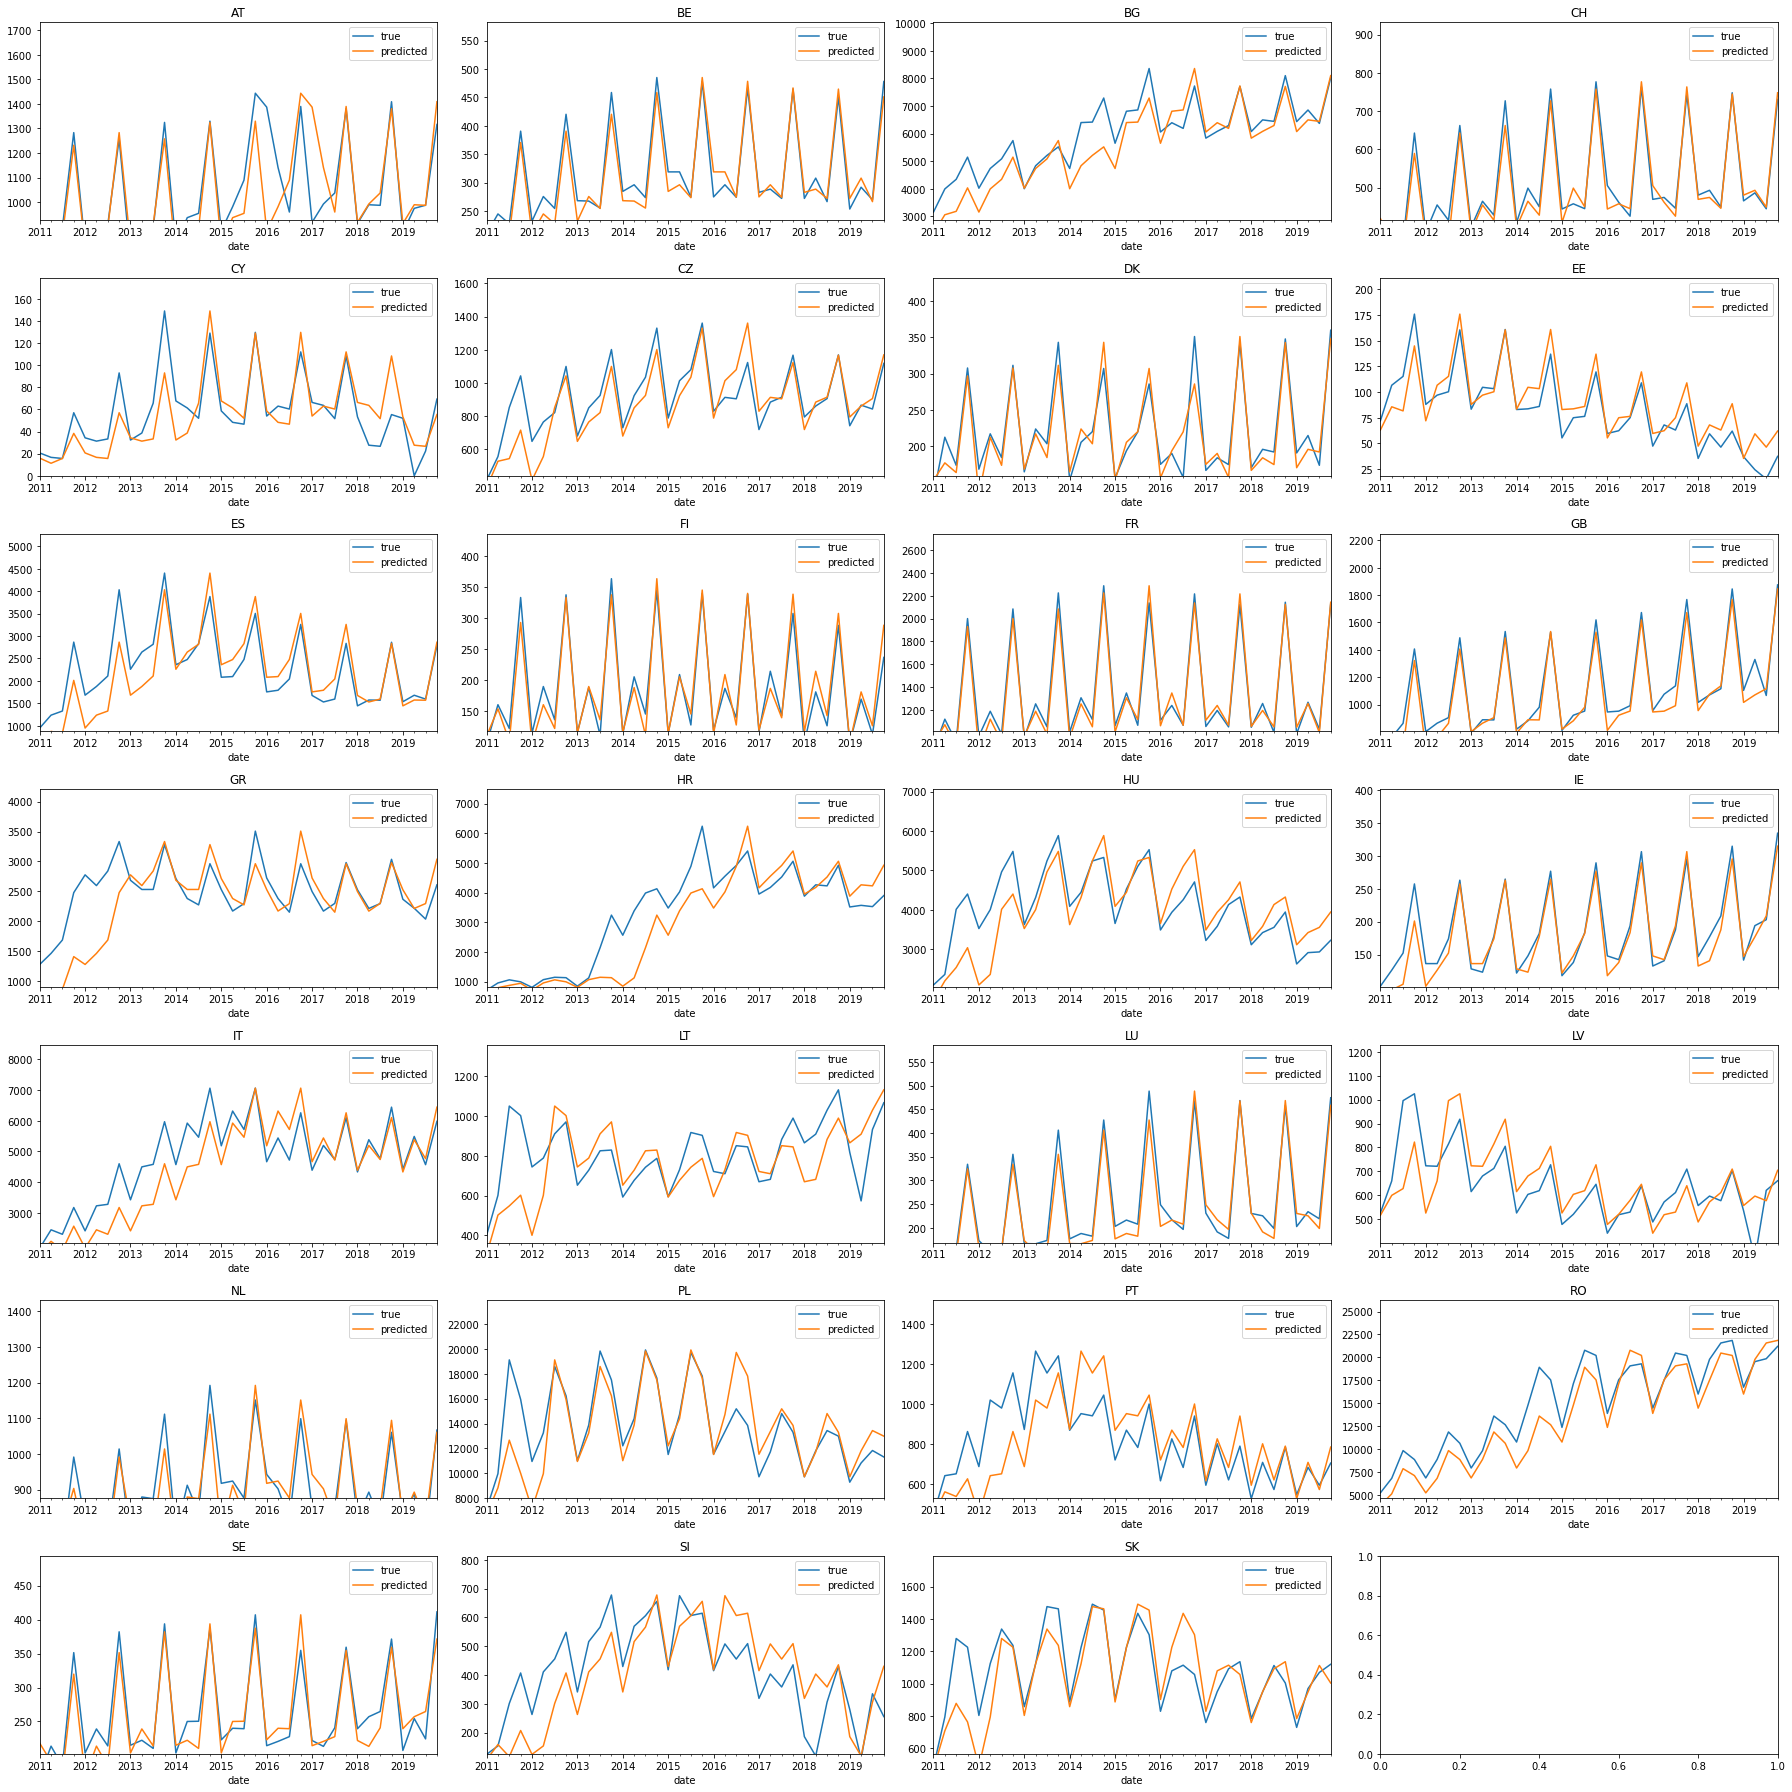

In [3]:
t_min = "2011-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.resample("3M").mean()
panel_lags = data.create_lags(panel_resampled, lags=[1], columns=["value"]).fillna(0.0)

x = panel_lags
y = panel_resampled["value"]


# # transform data
# transform = lambda df: df - df.shift(4)
# dataset_trans = dataset_resampled.transform(y_fcn=transform, x_fcn=transform)
# panel_trans = dataset_trans.create_panel()

# transformation: differencing + stacking
x_trans = x - x.shift(4)
y_trans = y - y.shift(4)

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
x_test = x_trans[t_split_upper:t_max]
y_test = y_trans[t_split_upper:t_max]

reg = multioutput.MultiOutputRegressor(
    dummy.DummyRegressor(strategy="constant", constant=0.0)
)
# reg = dummy.DummyRegressor(strategy="mean")

reg.fit(x_train, y_train)

cv_score = eval.score_cv(reg, x_train, y_train)
test_score = eval.score_test(reg, x_test, y_test)

print("Mean CV score:")
display(cv_score.mean())

print("OOS score:")
display(test_score)

# # backtransform y
pred_arr = reg.predict(x_trans[t_min:t_max])
y_pred_trans = pd.DataFrame(pred_arr, columns=y.columns, index=y[t_min:t_max].index)
y_pred = y_pred_trans + y.shift(4)

fig, axs = eval.plot_prediction(y_pred[t_min:t_max], y[t_min:t_max])
# fig, axs = eval.plot_prediction(y_pred_trans[t_min:t_max], y_trans[t_min:t_max])


elasticnet

In [7]:
t_min = "2011-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.resample("3M").mean()
panel_lags = data.create_lags(
    panel_resampled, lags=[1, 2, 3, 4], columns=["19"]
).fillna(0.0)

x = panel_lags
x.columns = ["_".join(col) for col in x.columns.values]  # flatten columns from x
y = panel_resampled["value"]


# # transform data
# transform = lambda df: df - df.shift(4)
# dataset_trans = dataset_resampled.transform(y_fcn=transform, x_fcn=transform)
# panel_trans = dataset_trans.create_panel()

# transformation: differencing + stacking
x_trans = x - x.shift(4)
y_trans = y - y.shift(4)

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
x_test = x_trans[t_split_upper:t_max]
y_test = y_trans[t_split_upper:t_max]

# cv = model_selection.TimeSeriesSplit(n_splits=5, test_size=4)
cv = model_selection.KFold(n_splits=7)

reg = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.ElasticNet(fit_intercept=False, positive=True, alpha=1,),
)
# reg.fit(x_train, y_train)

hptuner = model_selection.GridSearchCV(
    reg,
    {
        "elasticnet__fit_intercept": [True, False],
        "elasticnet__positive": [True, False],
        "elasticnet__alpha": [1, 2, 4, 6, 7, 8],
        "elasticnet__l1_ratio": [0.5, 0.55, 0.6, 0.7, 0.9],
    },
    cv=cv,
    scoring=eval.scorer_ev,
)
hptuner.fit(x_train, y_train)
reg = hptuner.best_estimator_
display(hptuner.best_params_)

cv_score = eval.score_cv(reg, x_train, y_train, cv=cv)
test_score = eval.score_test(reg, x_test, y_test)

print("Mean CV score:")
display(cv_score.mean())

print("OOS score:")
display(test_score)

# # backtransform y
pred_arr = reg.predict(x_trans[t_min:t_max])
y_pred_trans = pd.DataFrame(pred_arr, columns=y.columns, index=y[t_min:t_max].index)
y_pred = y_pred_trans + y.shift(4)


pred_arr_cv = model_selection.cross_val_predict(
    reg, x_trans[t_min:t_split_lower], y_trans[t_min:t_split_lower], cv=cv
)
y_pred_trans_cv = pd.DataFrame(
    pred_arr_cv, columns=y.columns, index=y[t_min:t_split_lower].index
)
y_pred_cv = y_pred_trans_cv + y.shift(4)


{'elasticnet__alpha': 8,
 'elasticnet__fit_intercept': True,
 'elasticnet__l1_ratio': 0.5,
 'elasticnet__positive': False}

Mean CV score:


fit_time                     0.013
score_time                   0.009
test_mae                  -228.499
test_rmse                 -256.473
test_explained_variance      0.277
test_r2                     -1.917
dtype: float64

OOS score:


mae                  -162.907
rmse                 -194.391
explained_variance      0.120
r2                     -0.568
dtype: float64

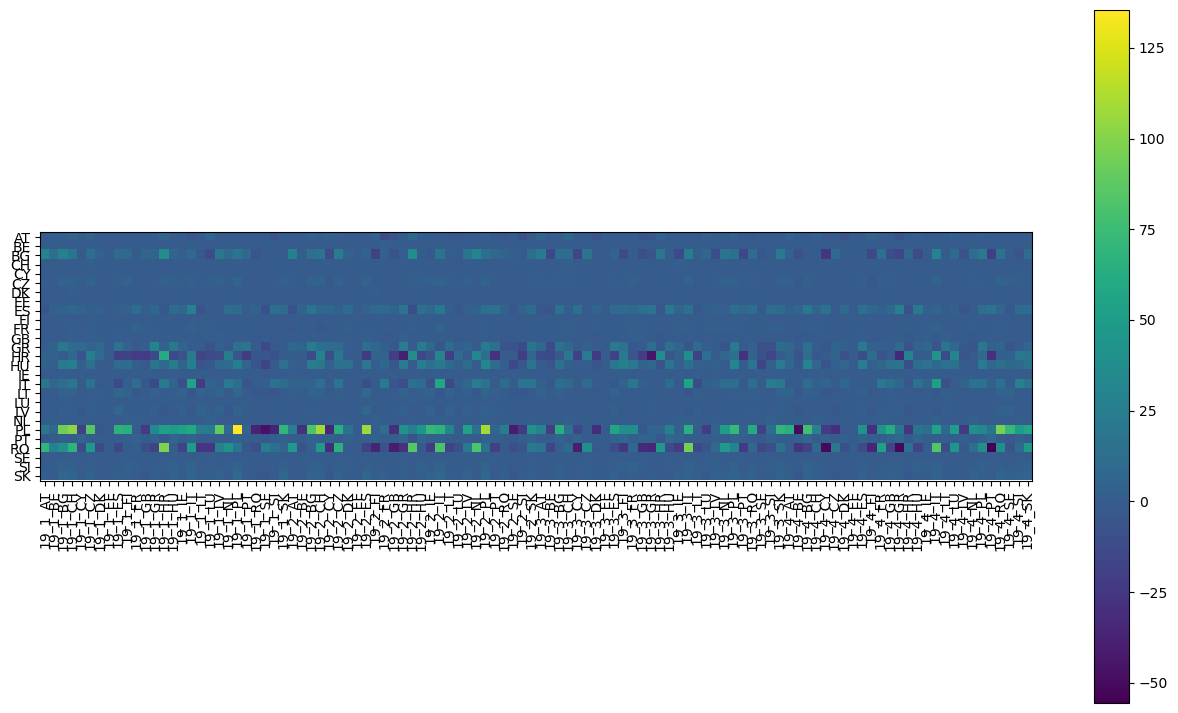

In [15]:
plt.figure(figsize=(16, 9))
plt.imshow(reg.steps[-1][1].coef_)
feature_names = x.columns
plt.yticks(np.arange(len(y.columns)), y.columns)
plt.xticks(np.arange(len(feature_names)), feature_names, rotation="vertical")
plt.colorbar()
plt.show()


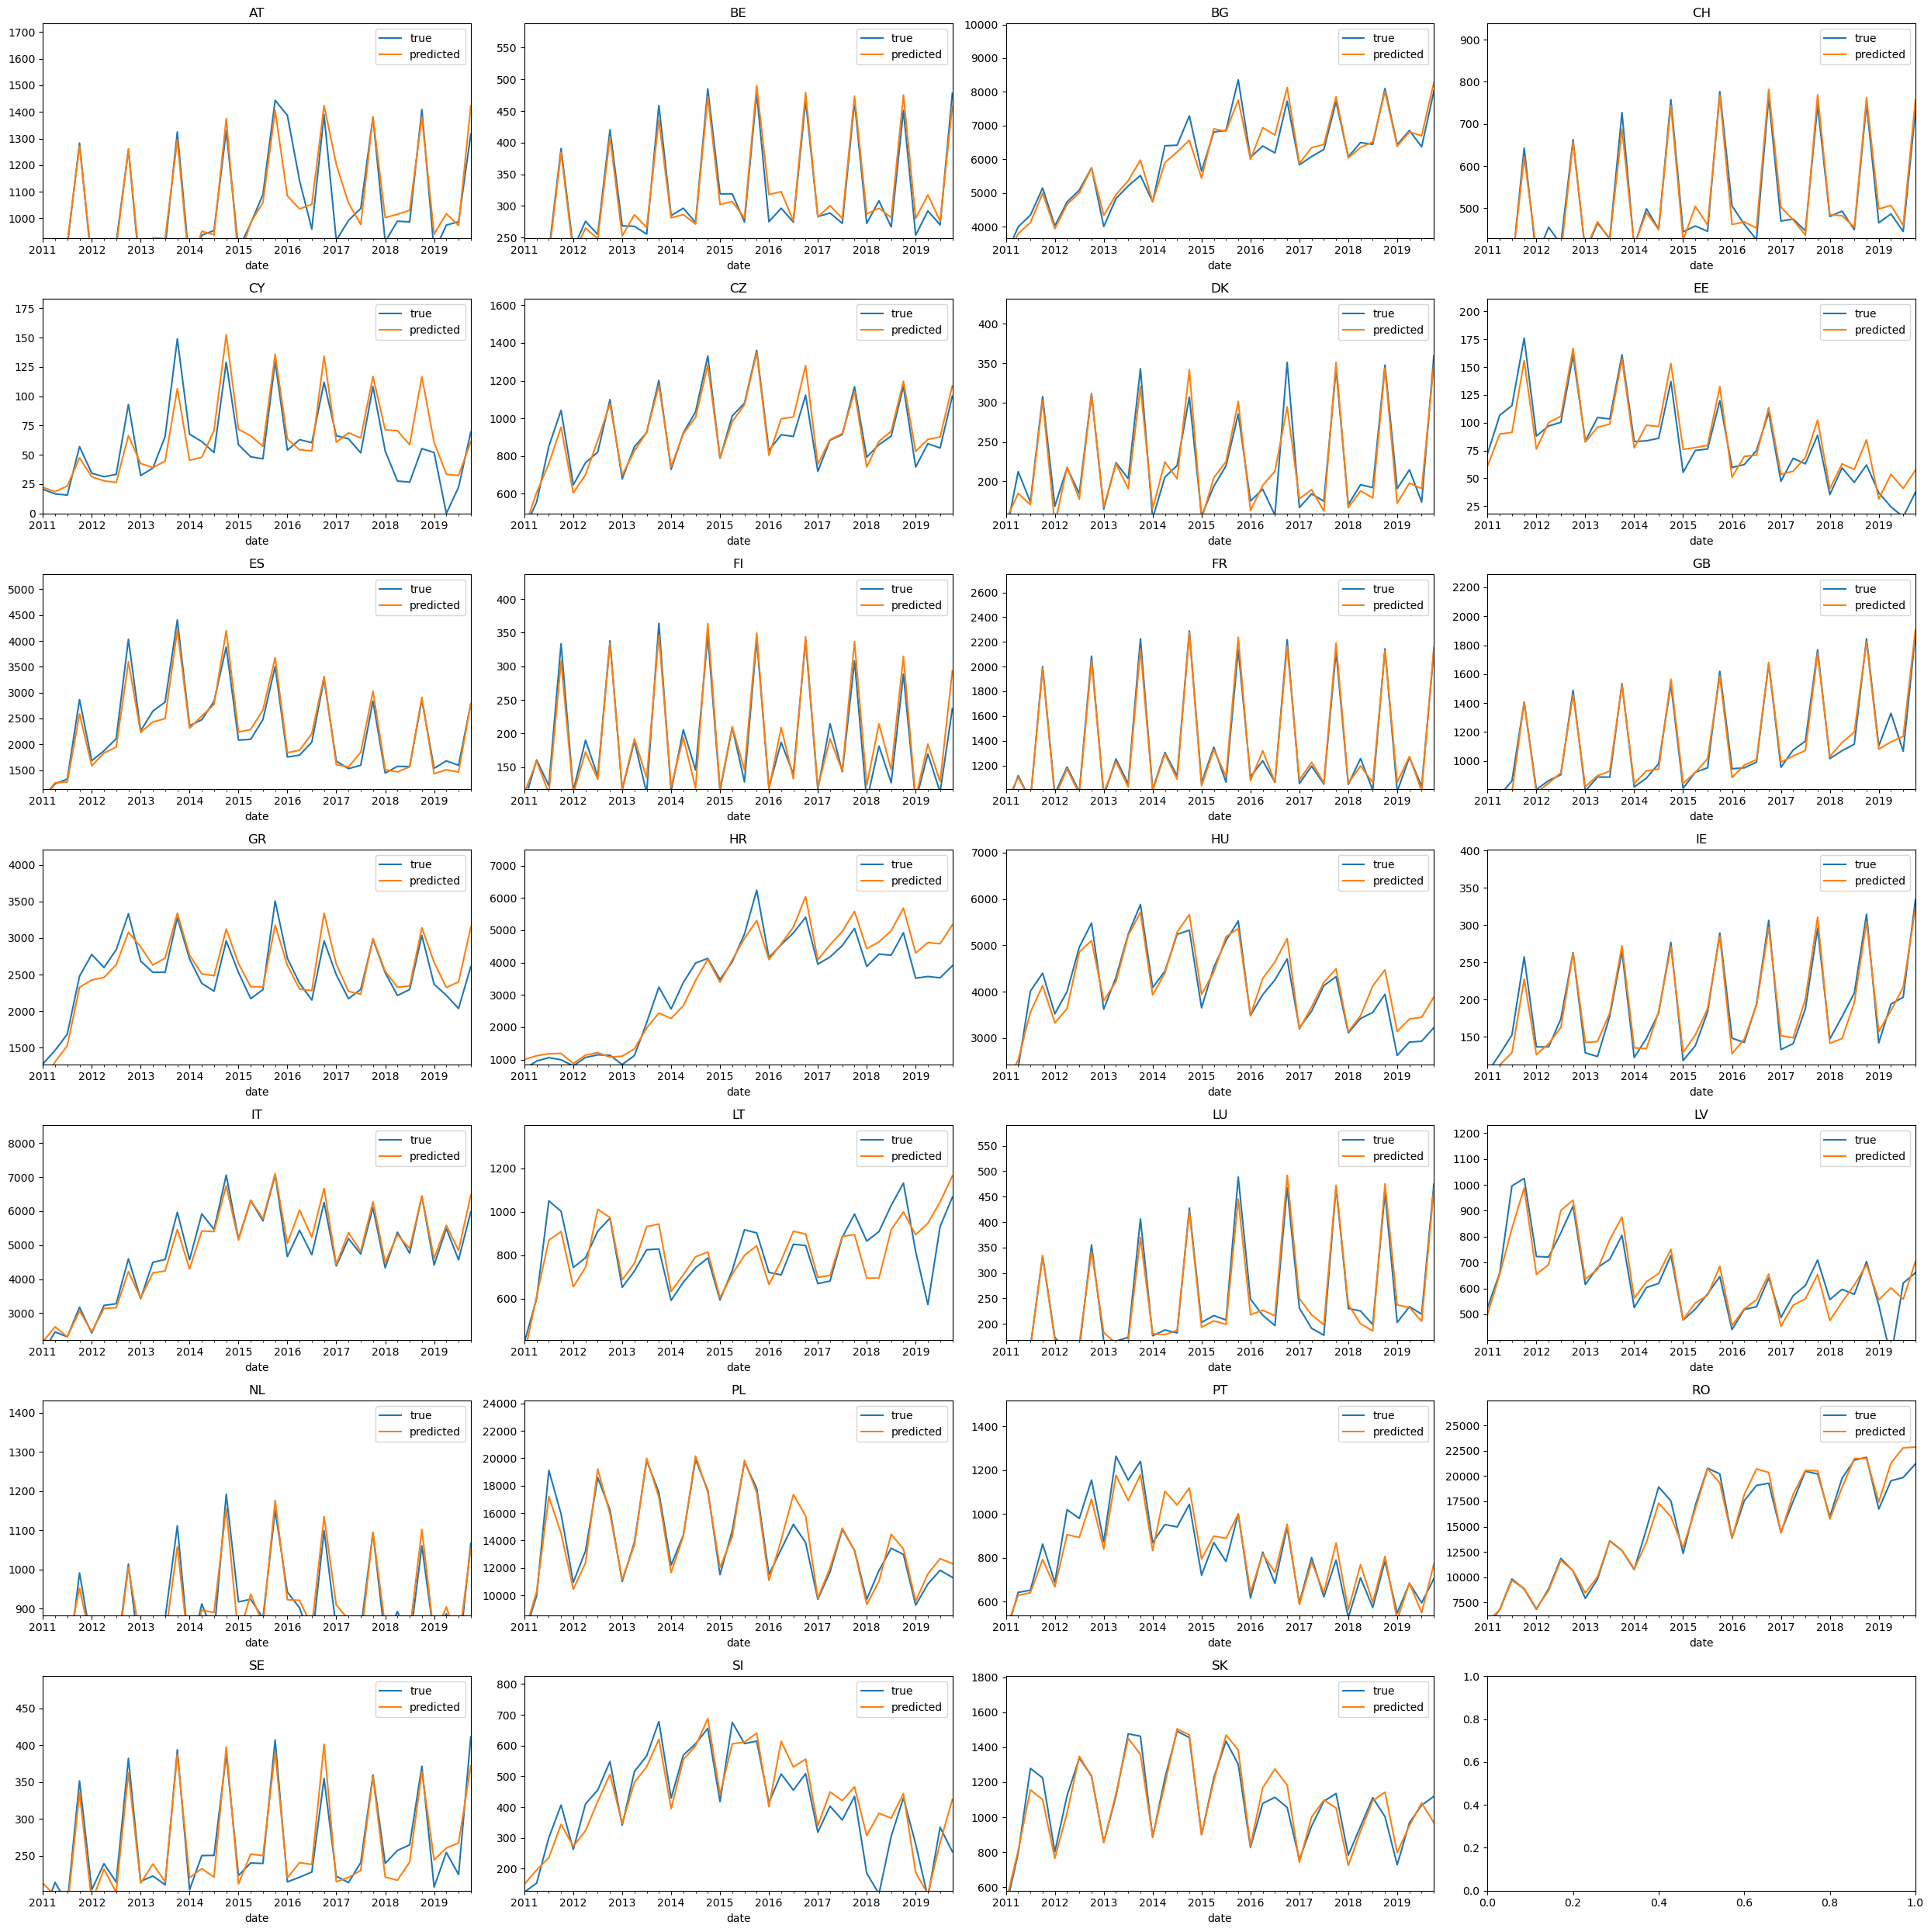

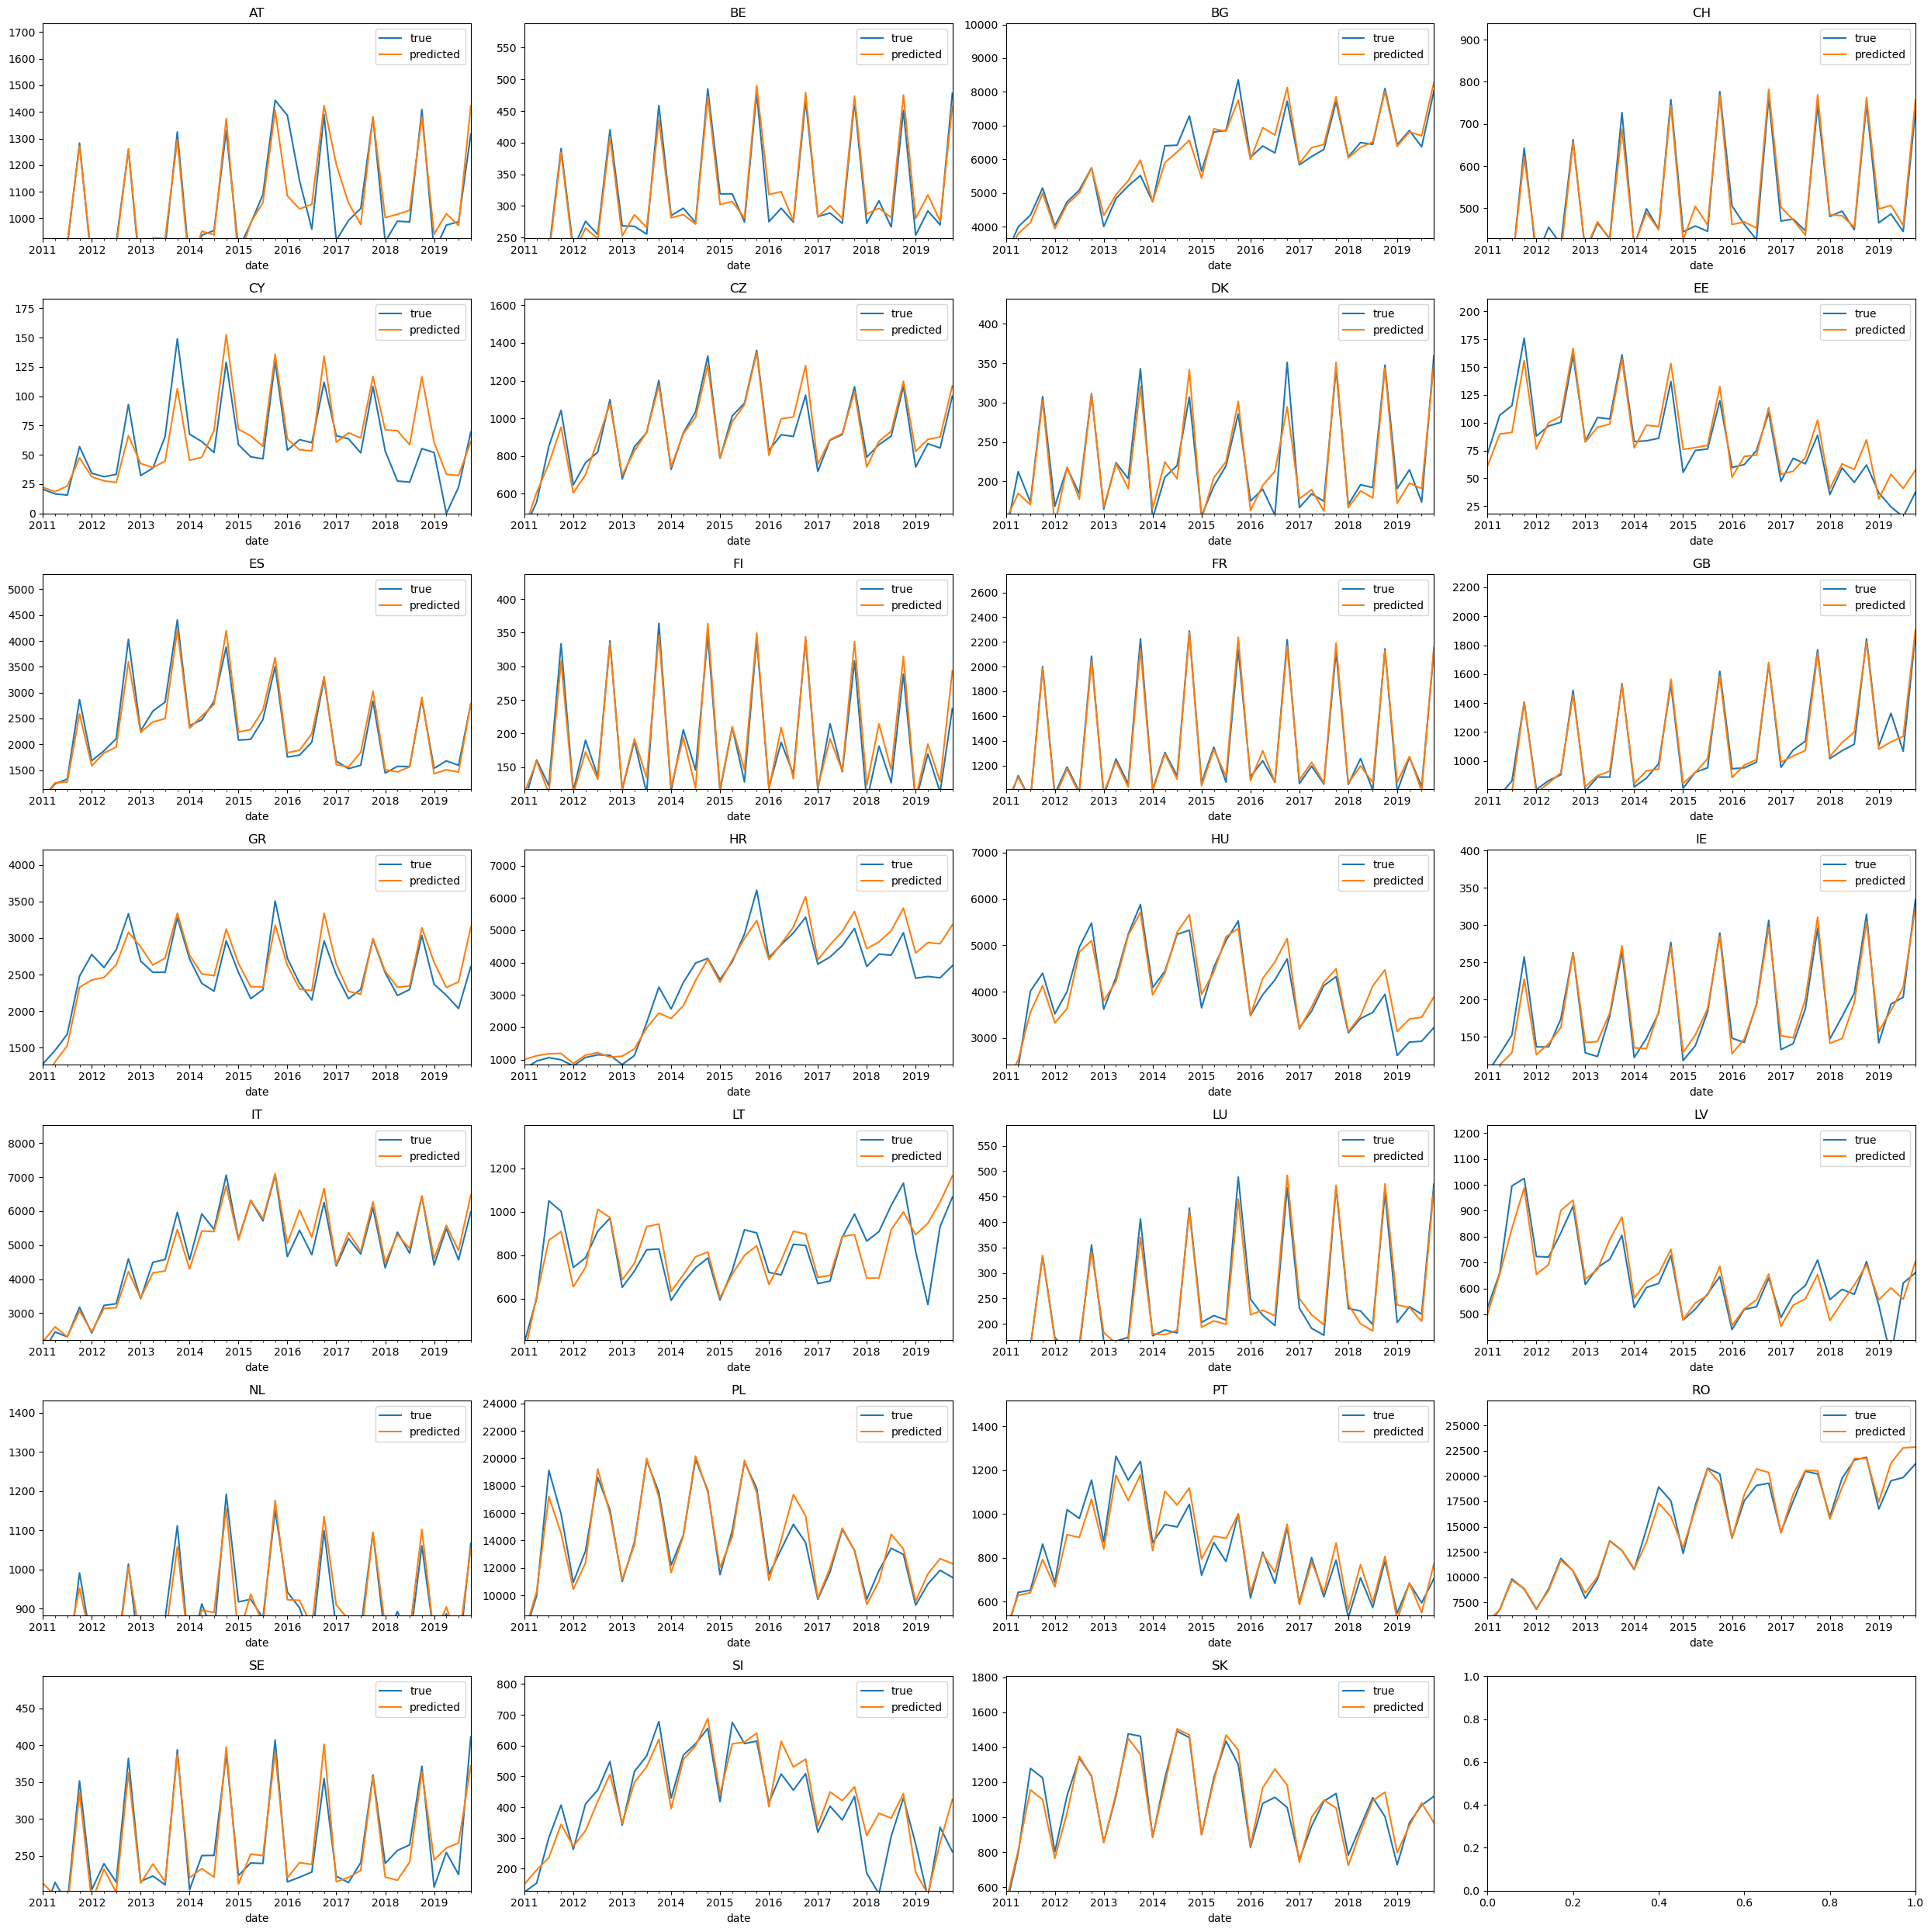

In [17]:
fig, axs = eval.plot_prediction(y_pred[t_min:t_max], y[t_min:t_max])
plt.show()


RF - only KW 19

In [44]:
t_min = "2012-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.resample("3M").mean()
panel_lags = data.create_lags(
    panel_resampled, lags=[1, 2, 3, 4], columns=["19"]
).fillna(0.0)

x = panel_lags
# x.columns = ["_".join(col) for col in x.columns.values]  # flatten columns from x
y = panel_resampled["value"]

# transformation: differencing + stacking
x_trans = np.log(x + 1) - np.log(x.shift(4) + 1)
y_trans = np.log(y + 10) - np.log(y.shift(4) + 10)

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
x_test = x_trans[t_split_upper:t_max]
y_test = y_trans[t_split_upper:t_max]

x_train_stacked, y_train_stacked = data.stack(x_train, y_train)
x_test_stacked, y_test_stacked = data.stack(x_test, y_test)

cv = model_selection.KFold(n_splits=6, shuffle=False)

ct = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ["country"]),
    remainder="passthrough",
    sparse_threshold=0,
)

reg = pipeline.make_pipeline(ct, ensemble.RandomForestRegressor(random_state=0),)

hptuner = model_selection.GridSearchCV(
    reg,
    {
        "randomforestregressor__min_samples_split": [2],
        "randomforestregressor__max_depth": [8],
        "randomforestregressor__ccp_alpha": [0.0, 0.01, 0.05],
        "randomforestregressor__min_samples_leaf": [4],
        "randomforestregressor__max_features": ["auto", "sqrt", "log2"],
    },
    cv=cv,
    scoring=eval.scorer_rmse,
    n_jobs=-1,
)
hptuner.fit(x_train_stacked, y_train_stacked)
reg = hptuner.best_estimator_
display(hptuner.best_params_)

cv_score = eval.score_cv(reg, x_train_stacked, y_train_stacked, cv=cv)

test_score = eval.score_test(reg, x_test_stacked, y_test_stacked)

print("Aggregate CV score:")
display(pd.concat({"mean": cv_score.mean(), "std": cv_score.std()}, axis=1))

print("Individual CV scores:")
display(cv_score)

print("Holdout score:")
display(test_score)


{'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__max_depth': 8,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2}

Aggregate CV score:


mean    std 
fit_time                 0.104  0.008
score_time               0.011  0.001
test_mae                -0.109  0.029
test_rmse               -0.156  0.046
test_explained_variance  0.070  0.232
test_r2_mod              0.067  0.346

Individual CV scores:


fit_time  score_time  test_mae  test_rmse  test_explained_variance  test_r2_mod
0    0.120      0.013     -0.157    -0.224             0.177              0.378   
1    0.105      0.011     -0.103    -0.165             0.015              0.185   
2    0.100      0.011     -0.115    -0.186             0.239              0.274   
3    0.100      0.009     -0.072    -0.095             0.300              0.263   
4    0.098      0.011     -0.112    -0.142             0.032             -0.180   
5    0.101      0.011     -0.092    -0.125            -0.344             -0.521

Holdout score:


mae                  -0.110
rmse                 -0.205
explained_variance   -0.011
r2_mod               -0.074
dtype: float64

RF: KW 19 + AR

In [45]:
t_min = "2012-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.resample("3M").mean()
panel_lags = data.create_lags(
    panel_resampled, lags=[1, 2, 3, 4], columns=["19", "value"]
).fillna(0.0)

x = panel_lags
# x.columns = ["_".join(col) for col in x.columns.values]  # flatten columns from x
y = panel_resampled["value"]

# transformation: differencing + stacking
x_trans = np.log(x + 1) - np.log(x.shift(4) + 1)
y_trans = np.log(y + 10) - np.log(y.shift(4) + 10)

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
x_test = x_trans[t_split_upper:t_max]
y_test = y_trans[t_split_upper:t_max]

x_train_stacked, y_train_stacked = data.stack(x_train, y_train)
x_test_stacked, y_test_stacked = data.stack(x_test, y_test)

cv = model_selection.KFold(n_splits=6, shuffle=False)

ct = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ["country"]),
    remainder="passthrough",
    sparse_threshold=0,
)

reg = pipeline.make_pipeline(ct, ensemble.RandomForestRegressor(random_state=0),)

hptuner = model_selection.GridSearchCV(
    reg,
    {
        "randomforestregressor__min_samples_split": [2],
        "randomforestregressor__max_depth": [8],
        "randomforestregressor__ccp_alpha": [0.0, 0.01, 0.05],
        "randomforestregressor__min_samples_leaf": [4],
        "randomforestregressor__max_features": ["auto", "sqrt", "log2"],
    },
    cv=cv,
    scoring=eval.scorer_rmse,
    n_jobs=-1,
)
hptuner.fit(x_train_stacked, y_train_stacked)
reg = hptuner.best_estimator_
display(hptuner.best_params_)

cv_score = eval.score_cv(reg, x_train_stacked, y_train_stacked, cv=cv)

test_score = eval.score_test(reg, x_test_stacked, y_test_stacked)

print("Aggregate CV score:")
display(eval.agg_cv_scores(cv_score, use_quantiles=True))

print("Individual CV scores:")
display(cv_score)

print("Holdout score:")
display(test_score)


{'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__max_depth': 8,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2}

Aggregate CV score:


fit_time                 0.25    0.208
                         0.50    0.214
                         0.75    0.246
score_time               0.25    0.009
                         0.50    0.010
                         0.75    0.010
test_mae                 0.25   -0.084
                         0.50   -0.078
                         0.75   -0.068
test_rmse                0.25   -0.122
                         0.50   -0.119
                         0.75   -0.093
test_explained_variance  0.25    0.287
                         0.50    0.482
                         0.75    0.630
test_r2_mod              0.25    0.345
                         0.50    0.519
                         0.75    0.654
dtype: float64

Individual CV scores:


fit_time  score_time  test_mae  test_rmse  test_explained_variance  test_r2_mod
0    0.320      0.010     -0.086    -0.121             0.667              0.818   
1    0.201      0.009     -0.077    -0.131             0.410              0.486   
2    0.205      0.009     -0.079    -0.122             0.654              0.688   
3    0.214      0.009     -0.057    -0.074             0.555              0.553   
4    0.215      0.010     -0.091    -0.116             0.245              0.212   
5    0.256      0.010     -0.064    -0.085             0.195              0.298

Holdout score:


mae                  -0.092
rmse                 -0.176
explained_variance    0.196
r2_mod                0.208
dtype: float64

In [47]:
eval.agg_cv_scores(cv_score, use_quantiles=True)

0.25   0.50   0.75 
fit_time                 0.208  0.214  0.246
score_time               0.009  0.010  0.010
test_mae                -0.084 -0.078 -0.068
test_rmse               -0.122 -0.119 -0.093
test_explained_variance  0.287  0.482  0.630
test_r2_mod              0.345  0.519  0.654

In [42]:
test_scores_c = eval.score_test_countries(reg, x_test, y_test, countries)
print("Holdout scores per country:")
display(test_scores_c)

cv_scores_c = eval.score_cv_countries(reg, x_train, y_train, countries, cv)
print("CV scores per country:")
display(eval.agg_cv_scores(cv_scores_c, level=0, use_quantiles=True))


Holdout scores per country:


mae   rmse   explained_variance  r2_mod
FR -0.041 -0.055        -1.522        -1.666
GB -0.070 -0.094        -0.527        -0.170
IT -0.031 -0.035         0.231         0.191
ES -0.044 -0.062         0.054         0.042
PL -0.054 -0.064        -0.233         0.408
RO -0.033 -0.039         0.687         0.728
NL -0.046 -0.057        -1.188        -1.215
BE -0.063 -0.071        -1.042        -1.314
GR -0.039 -0.051         0.434         0.502
CZ -0.031 -0.042         0.584         0.365
PT -0.048 -0.060         0.064         0.426
SE -0.101 -0.119        -0.129        -0.128
HU -0.060 -0.077         0.358         0.714
AT -0.032 -0.037        -0.111        -0.181
CH -0.016 -0.022         0.100         0.013
BG -0.036 -0.042        -1.174         0.101
DK -0.069 -0.077        -0.471        -0.159
FI -0.059 -0.069         0.120         0.678
SK -0.056 -0.076        -0.262        -0.297
IE -0.084 -0.094        -0.373         0.149
HR -0.056 -0.063         0.732         0.761
LT -0.139 -0.173         0.408         0.411
SI -0.390 -0.494        -0.007         0.063
LV -0.129 -0.202         0.041         0.071
EE -0.294 -0.380        -0.239         0.253
CY -0.407 -0.537         0.021         0.210
LU -0.089 -0.101        -0.463        -0.317

CV scores per country:


mae                  rmse                explained_variance               r2_mod              
    0.25   0.50   0.75   0.25   0.50   0.75         0.25         0.50   0.75   0.25   0.50   0.75 
AT -0.117 -0.045 -0.030 -0.159 -0.053 -0.041       -1.097       -0.622 -0.053 -0.581  0.098  0.429
BE -0.056 -0.040 -0.025 -0.074 -0.049 -0.032       -0.886       -0.701 -0.497 -0.029  0.125  0.694
BG -0.061 -0.054 -0.043 -0.071 -0.069 -0.053       -0.938       -0.435  0.285  0.281  0.578  0.710
CH -0.076 -0.053 -0.033 -0.083 -0.061 -0.038       -0.707       -0.424  0.038 -0.389  0.210  0.466
CY -0.221 -0.149 -0.126 -0.266 -0.174 -0.150       -1.405       -0.657  0.114 -0.167  0.163  0.652
CZ -0.093 -0.056 -0.041 -0.097 -0.065 -0.048       -0.718       -0.120  0.327  0.479  0.588  0.687
DK -0.113 -0.094 -0.053 -0.122 -0.115 -0.068       -1.007       -0.549 -0.103 -0.919 -0.141  0.164
EE -0.116 -0.093 -0.068 -0.131 -0.115 -0.099       -0.537       -0.082  0.060 -0.475  0.306  0.510
ES -0.123 -0.077 -0.066 -0.146 -0.089 -0.072       -0.421       -0.263 -0.234  0.634  0.719  0.813
FI -0.092 -0.079 -0.061 -0.114 -0.091 -0.074       -0.671       -0.570 -0.229 -0.595 -0.353 -0.180
FR -0.044 -0.043 -0.040 -0.056 -0.047 -0.043       -0.861       -0.417  0.086 -0.334  0.228  0.488
GB -0.051 -0.044 -0.039 -0.066 -0.052 -0.045       -1.342       -0.196  0.055 -0.740  0.030  0.497
GR -0.087 -0.069 -0.055 -0.111 -0.088 -0.065       -0.371        0.165  0.407 -0.154  0.246  0.459
HR -0.265 -0.124 -0.051 -0.304 -0.141 -0.059       -0.060        0.144  0.336  0.569  0.782  0.813
HU -0.090 -0.055 -0.049 -0.100 -0.068 -0.054       -2.890        0.135  0.425  0.291  0.432  0.560
IE -0.083 -0.064 -0.049 -0.103 -0.084 -0.061       -1.325       -0.659 -0.030 -0.677 -0.190  0.284
IT -0.053 -0.040 -0.031 -0.061 -0.045 -0.038       -0.289       -0.026  0.569  0.841  0.943  0.950
LT -0.086 -0.079 -0.050 -0.100 -0.089 -0.058       -1.041        0.249  0.434  0.286  0.487  0.694
LU -0.072 -0.057 -0.043 -0.077 -0.065 -0.048       -1.523       -0.527  0.104  0.245  0.400  0.769
LV -0.066 -0.062 -0.051 -0.075 -0.066 -0.058       -1.693       -0.857 -0.432  0.298  0.611  0.741
NL -0.063 -0.048 -0.044 -0.069 -0.055 -0.052       -0.778       -0.214  0.113 -0.072  0.315  0.399
PL -0.076 -0.050 -0.034 -0.111 -0.064 -0.041       -0.088        0.628  0.677 -0.236  0.650  0.775
PT -0.085 -0.069 -0.050 -0.107 -0.076 -0.056       -0.529       -0.047  0.435  0.644  0.720  0.854
RO -0.082 -0.058 -0.048 -0.093 -0.068 -0.059       -5.894       -1.457 -0.046  0.397  0.592  0.857
SE -0.079 -0.076 -0.057 -0.086 -0.085 -0.070       -1.073       -0.310 -0.160 -1.114 -0.508  0.042
SI -0.113 -0.086 -0.075 -0.140 -0.098 -0.079       -0.231        0.185  0.397  0.555  0.741  0.876
SK -0.090 -0.074 -0.040 -0.101 -0.085 -0.051        0.212        0.256  0.319  0.299  0.460  0.627

RF: only AR

In [8]:
t_min = "2012-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.resample("3M").mean()
panel_lags = data.create_lags(
    panel_resampled, lags=[1, 2, 3, 4], columns=["value"]
).fillna(0.0)

x = panel_lags
y = panel_resampled["value"]

# transformation: differencing + stacking
x_trans = np.log(x + 1) - np.log(x.shift(4) + 1)
y_trans = np.log(y + 10) - np.log(y.shift(4) + 10)

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
x_test = x_trans[t_split_upper:t_max]
y_test = y_trans[t_split_upper:t_max]

x_train_stacked = x_trans[t_min:t_split_lower].stack().reset_index(level=1)
y_train_stacked = y_trans[t_min:t_split_lower].stack().droplevel(level=1)
x_test_stacked = x_trans[t_split_upper:t_max].stack().reset_index(level=1)
y_test_stacked = y_trans[t_split_upper:t_max].stack().droplevel(level=1)

cv = model_selection.KFold(n_splits=6, shuffle=False)

ct = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ["country"]),
    remainder="passthrough",
    sparse_threshold=0,
)

reg = pipeline.make_pipeline(ct, ensemble.RandomForestRegressor(random_state=0),)

hptuner = model_selection.GridSearchCV(
    reg,
    {
        "randomforestregressor__min_samples_split": [2],
        "randomforestregressor__max_depth": [8],
        "randomforestregressor__ccp_alpha": [0.0, 0.01, 0.05],
        "randomforestregressor__min_samples_leaf": [4],
        "randomforestregressor__max_features": ["auto", "sqrt", "log2"],
    },
    cv=cv,
    scoring=eval.scorer_rmse,
    n_jobs=-1,
)
hptuner.fit(x_train_stacked, y_train_stacked)
reg = hptuner.best_estimator_
display(hptuner.best_params_)

cv_score = eval.score_cv(reg, x_train_stacked, y_train_stacked, cv=cv)

test_score = eval.score_test(reg, x_test_stacked, y_test_stacked)
test_score_ind = eval.score_test_stacked(reg, x_test, y_test, countries)

print("Aggregate CV score:")
display(pd.concat({"mean": cv_score.mean(), "std": cv_score.std()}, axis=1))

print("Individual CV scores:")
display(cv_score)

print("OOS score:")
display(test_score)

print("OOS score for countries:")
display(test_score_ind)


{'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__max_depth': 8,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2}

Aggregate CV score:


mean    std 
fit_time                 0.155  0.029
score_time               0.009  0.001
test_mae                -0.079  0.016
test_rmse               -0.110  0.024
test_explained_variance  0.435  0.230
test_r2                  0.399  0.261
test_r2_mod              0.484  0.259

Individual CV scores:


fit_time  score_time  test_mae  test_rmse  test_explained_variance  test_r2  test_r2_mod
0    0.183      0.008     -0.091    -0.123             0.667            0.646      0.813   
1    0.138      0.008     -0.087    -0.135             0.398            0.334      0.453   
2    0.137      0.008     -0.080    -0.118             0.674            0.673      0.705   
3    0.135      0.011     -0.057    -0.075             0.534            0.528      0.534   
4    0.135      0.011     -0.096    -0.123             0.159            0.032      0.117   
5    0.201      0.009     -0.063    -0.086             0.180            0.178      0.284

OOS score:


mae                  -0.091
rmse                 -0.176
explained_variance    0.195
r2                    0.155
r2_mod                0.206
dtype: float64

OOS score for countries:


mae   rmse   explained_variance   r2    r2_mod
FR -0.042 -0.050        -1.190       -1.206  -1.193
GB -0.059 -0.079        -0.081       -0.094   0.178
IT -0.037 -0.042        -0.028       -0.119  -0.118
ES -0.048 -0.064        -0.001       -0.032  -0.032
PL -0.046 -0.057         0.153       -0.195   0.516
RO -0.036 -0.044         0.605        0.543   0.640
NL -0.033 -0.045        -0.151       -0.444  -0.369
BE -0.051 -0.057        -0.553       -0.584  -0.520
GR -0.043 -0.052         0.491        0.319   0.483
CZ -0.032 -0.043         0.401        0.270   0.323
PT -0.051 -0.071        -0.276       -0.316   0.194
SE -0.105 -0.121        -0.177       -0.197  -0.156
HU -0.072 -0.078         0.753       -0.651   0.706
AT -0.027 -0.031         0.023       -0.277   0.163
CH -0.014 -0.018         0.445        0.319   0.319
BG -0.032 -0.038        -0.799       -0.816   0.252
DK -0.068 -0.077        -0.468       -0.632  -0.141
FI -0.064 -0.077        -0.264       -0.762   0.593
SK -0.051 -0.068        -0.053       -0.060  -0.049
IE -0.082 -0.088        -0.172       -0.428   0.247
HR -0.065 -0.074         0.696        0.242   0.673
LT -0.136 -0.179         0.377        0.368   0.373
SI -0.382 -0.476         0.059       -0.132   0.131
LV -0.122 -0.205         0.035       -0.044   0.044
EE -0.293 -0.375        -0.188       -1.019   0.273
CY -0.397 -0.546        -0.085       -0.488   0.185
LU -0.083 -0.100        -0.457       -0.530  -0.291

RF: KW 19 + AR + aug

In [10]:
t_min = "2012-01-01"
t_max = "2019-12-01"
t_split_lower = "2017-12-01"
t_split_upper = "2018-01-01"

panel_resampled = panel.rolling("90D").mean()
panel_lags = data.create_lags(
    panel_resampled, lags=[3, 6, 9, 12], columns=["19", "value"]
).fillna(0.0)

x = panel_lags
# x.columns = ["_".join(col) for col in x.columns.values]  # flatten columns from x
y = panel_resampled["value"]

# transformation: differencing + stacking
x_trans = np.log(x + 1) - np.log(x.shift(12) + 1)
y_trans = np.log(y + 10) - np.log(y.shift(12) + 10)

# x_trans_stack = x_trans.stack().reset_index(level=1)
# y_trans_stack = y_trans.stack().droplevel(level=1)

# x_train = x_trans_stack[t_min:t_split_lower]
# y_train = y_trans_stack[t_min:t_split_lower]
# x_test = x_trans_stack[t_split_upper:t_max]
# y_test = y_trans_stack[t_split_upper:t_max]

test_dates = [
    "2018-01-01",
    "2018-04-01",
    "2018-07-01",
    "2018-10-01",
    "2019-01-01",
    "2019-04-01",
    "2019-07-01",
    "2019-10-01",
]

x_train = x_trans[t_min:t_split_lower]
y_train = y_trans[t_min:t_split_lower]
# x_test = x_trans[t_split_upper:t_max]
# y_test = y_trans[t_split_upper:t_max]
x_test = x_trans.loc[test_dates]
y_test = y_trans.loc[test_dates]

x_train_stacked = x_trans[t_min:t_split_lower].stack().reset_index(level=1)
y_train_stacked = y_trans[t_min:t_split_lower].stack().droplevel(level=1)
x_test_stacked = x_trans.loc[test_dates].stack().reset_index(level=1)
y_test_stacked = y_trans.loc[test_dates].stack().droplevel(level=1)

cv = model_selection.KFold(n_splits=6)

ct = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(), ["country"]),
    remainder="passthrough",
    sparse_threshold=0,
)

reg = pipeline.make_pipeline(ct, ensemble.RandomForestRegressor(random_state=0),)

hptuner = model_selection.GridSearchCV(
    reg,
    {
        "randomforestregressor__min_samples_split": [2],
        "randomforestregressor__max_depth": [8],
        "randomforestregressor__ccp_alpha": [0.0, 0.01, 0.05],
        "randomforestregressor__min_samples_leaf": [4],
        "randomforestregressor__max_features": ["auto", "sqrt", "log2"],
    },
    cv=cv,
    scoring=eval.scorer_rmse,
    n_jobs=-1,
)
hptuner.fit(x_train_stacked, y_train_stacked)
reg = hptuner.best_estimator_
display(hptuner.best_params_)

cv_score = eval.score_cv(reg, x_train_stacked, y_train_stacked, cv=cv)

test_score = eval.score_test(reg, x_test_stacked, y_test_stacked)
test_score_ind = eval.score_test_stacked(reg, x_test, y_test, countries)

print("Aggregate CV score:")
display(pd.concat({"mean": cv_score.mean(), "std": cv_score.std()}, axis=1))

print("Individual CV scores:")
display(cv_score)

print("OOS score:")
display(test_score)

print("OOS score for countries:")
display(test_score_ind)


{'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__max_depth': 8,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2}

Aggregate CV score:


mean    std 
fit_time                 0.492  0.040
score_time               0.011  0.002
test_mae                -0.075  0.013
test_rmse               -0.108  0.024
test_explained_variance  0.459  0.173
test_r2_mod              0.507  0.210

Individual CV scores:


fit_time  score_time  test_mae  test_rmse  test_explained_variance  test_r2_mod
0    0.485      0.010     -0.090    -0.126             0.607              0.769   
1    0.460      0.011     -0.079    -0.131             0.503              0.542   
2    0.519      0.014     -0.081    -0.122             0.658              0.688   
3    0.560      0.009     -0.058    -0.078             0.475              0.477   
4    0.455      0.009     -0.084    -0.111             0.235              0.196   
5    0.477      0.010     -0.059    -0.079             0.273              0.369

OOS score:


mae                  -0.093
rmse                 -0.178
explained_variance    0.189
r2_mod                0.191
dtype: float64

OOS score for countries:


mae   rmse   explained_variance  r2_mod
FR -0.038 -0.048        -1.008        -1.058
GB -0.056 -0.080        -0.102         0.150
IT -0.030 -0.035         0.191         0.190
ES -0.041 -0.053         0.296         0.290
PL -0.055 -0.064        -0.015         0.408
RO -0.038 -0.045         0.535         0.632
NL -0.047 -0.058        -1.252        -1.250
BE -0.058 -0.065        -0.844        -0.939
GR -0.040 -0.056         0.412         0.408
CZ -0.035 -0.047         0.376         0.192
PT -0.042 -0.057         0.152         0.475
SE -0.093 -0.108         0.059         0.069
HU -0.070 -0.081         0.464         0.686
AT -0.032 -0.037         0.053        -0.162
CH -0.019 -0.024         0.181        -0.188
BG -0.027 -0.036        -0.464         0.332
DK -0.059 -0.068        -0.150         0.117
FI -0.075 -0.089         0.002         0.456
SK -0.059 -0.079        -0.348        -0.417
IE -0.083 -0.092        -0.365         0.176
HR -0.072 -0.084         0.656         0.575
LT -0.134 -0.175         0.411         0.399
SI -0.389 -0.483         0.025         0.107
LV -0.122 -0.200         0.054         0.087
EE -0.309 -0.387        -0.123         0.225
CY -0.405 -0.545         0.016         0.185
LU -0.097 -0.104        -0.649        -0.403

In [128]:
cv = model_selection.KFold(n_splits=6, shuffle=False)

for c in ["IT"]:
    scores_country = []
    for i_train, i_test in cv.split(x_train):
        x_train_tmp = x_train.iloc[i_train].stack().reset_index(level=1)
        x_test_tmp = x_train.iloc[i_test].xs(c, level=1, axis=1).assign(country=c)
        y_train_tmp = y_train.iloc[i_train].stack().droplevel(level=1)
        y_test_tmp = y_train.iloc[i_test][c]
        reg_tmp = reg.fit(x_train_tmp, y_train_tmp)
        scores = {
            k: s(reg, x_test_tmp, y_test_tmp) for k, s in eval.default_scoring.items()
        }
        scores_country.append(scores)
    display(pd.DataFrame(scores_country))
    display(
        pd.concat(
            {
                "mean": pd.DataFrame(scores_country).mean(),
                "std": pd.DataFrame(scores_country).std(),
            },
            axis=1,
        )
    )


mae   rmse   explained_variance   r2  
0 -0.074 -0.077         0.674       -2.521
1 -0.044 -0.056        -0.068       -1.355
2 -0.038 -0.044         0.591        0.475
3 -0.022 -0.026         0.801        0.777
4 -0.057 -0.062        -0.391       -1.830
5 -0.033 -0.036        -0.642       -1.084

mean    std 
mae                -0.044  0.018
rmse               -0.050  0.019
explained_variance  0.161  0.610
r2                 -0.923  1.299

In [77]:
for c in countries:
    X_tmp = x_train.xs(c, level=1, axis=1).assign(country=c)
    scores[c] = eval.score_cv(reg, X_tmp, y_train[c], cv=cv)
pd.concat(scores).mean(level=0)

fit_time  score_time  test_mae  test_rmse  test_explained_variance  test_r2
FR    0.073      0.009     -0.048    -0.056            -0.600           -4.325 
GB    0.075      0.009     -0.051    -0.062            -0.091           -1.769 
IT    0.091      0.010     -0.076    -0.081             0.188           -5.759 
ES    0.134      0.017     -0.105    -0.113            -0.170           -2.830 
PL    0.113      0.013     -0.081    -0.096            -0.089           -0.731 
RO    0.118      0.017     -0.087    -0.098            -2.230           -8.803 
NL    0.106      0.013     -0.063    -0.069            -0.210           -2.661 
BE    0.155      0.017     -0.050    -0.059            -0.962           -2.744 
GR    0.129      0.017     -0.174    -0.195            -1.236           -4.900 
CZ    0.092      0.012     -0.080    -0.095            -0.069           -2.054 
PT    0.081      0.049     -0.125    -0.135            -0.333           -5.849 
SE    0.104      0.012     -0.077    -0.085            -0.003           -3.543 
HU    0.141      0.016     -0.107    -0.124            -2.397           -6.593 
AT    0.118      0.012     -0.097    -0.119            -0.667           -4.706 
CH    0.141      0.017     -0.046    -0.060            -0.221           -0.671 
BG    0.096      0.012     -0.091    -0.101            -0.581           -5.914 
DK    0.100      0.012     -0.091    -0.114            -0.670           -1.625 
FI    0.112      0.013     -0.080    -0.096             0.096           -0.894 
SK    0.096      0.011     -0.097    -0.121             0.109           -1.852 
IE    0.092      0.012     -0.079    -0.097            -0.288           -2.050 
HR    0.090      0.011     -0.266    -0.306            -3.255          -45.816 
LT    0.098      0.012     -0.100    -0.117             0.010           -2.679 
SI    0.098      0.012     -0.188    -0.216            -0.024          -12.350 
LV    0.099      0.012     -0.091    -0.101            -1.017          -13.995 
EE    0.104      0.013     -0.104    -0.125            -0.010           -1.583 
CY    0.110      0.013     -0.207    -0.232            -0.185           -5.092 
LU    0.095      0.011     -0.071    -0.079            -5.168          -58.625

In [210]:
pd.Series(reg.steps[-1][1].feature_importances_[-8:], index=x_trans_stack.columns[1:])

19_1       0.031
19_2       0.019
19_3       0.030
19_4       0.023
value_1    0.772
value_2    0.043
value_3    0.028
value_4    0.043
dtype: float64

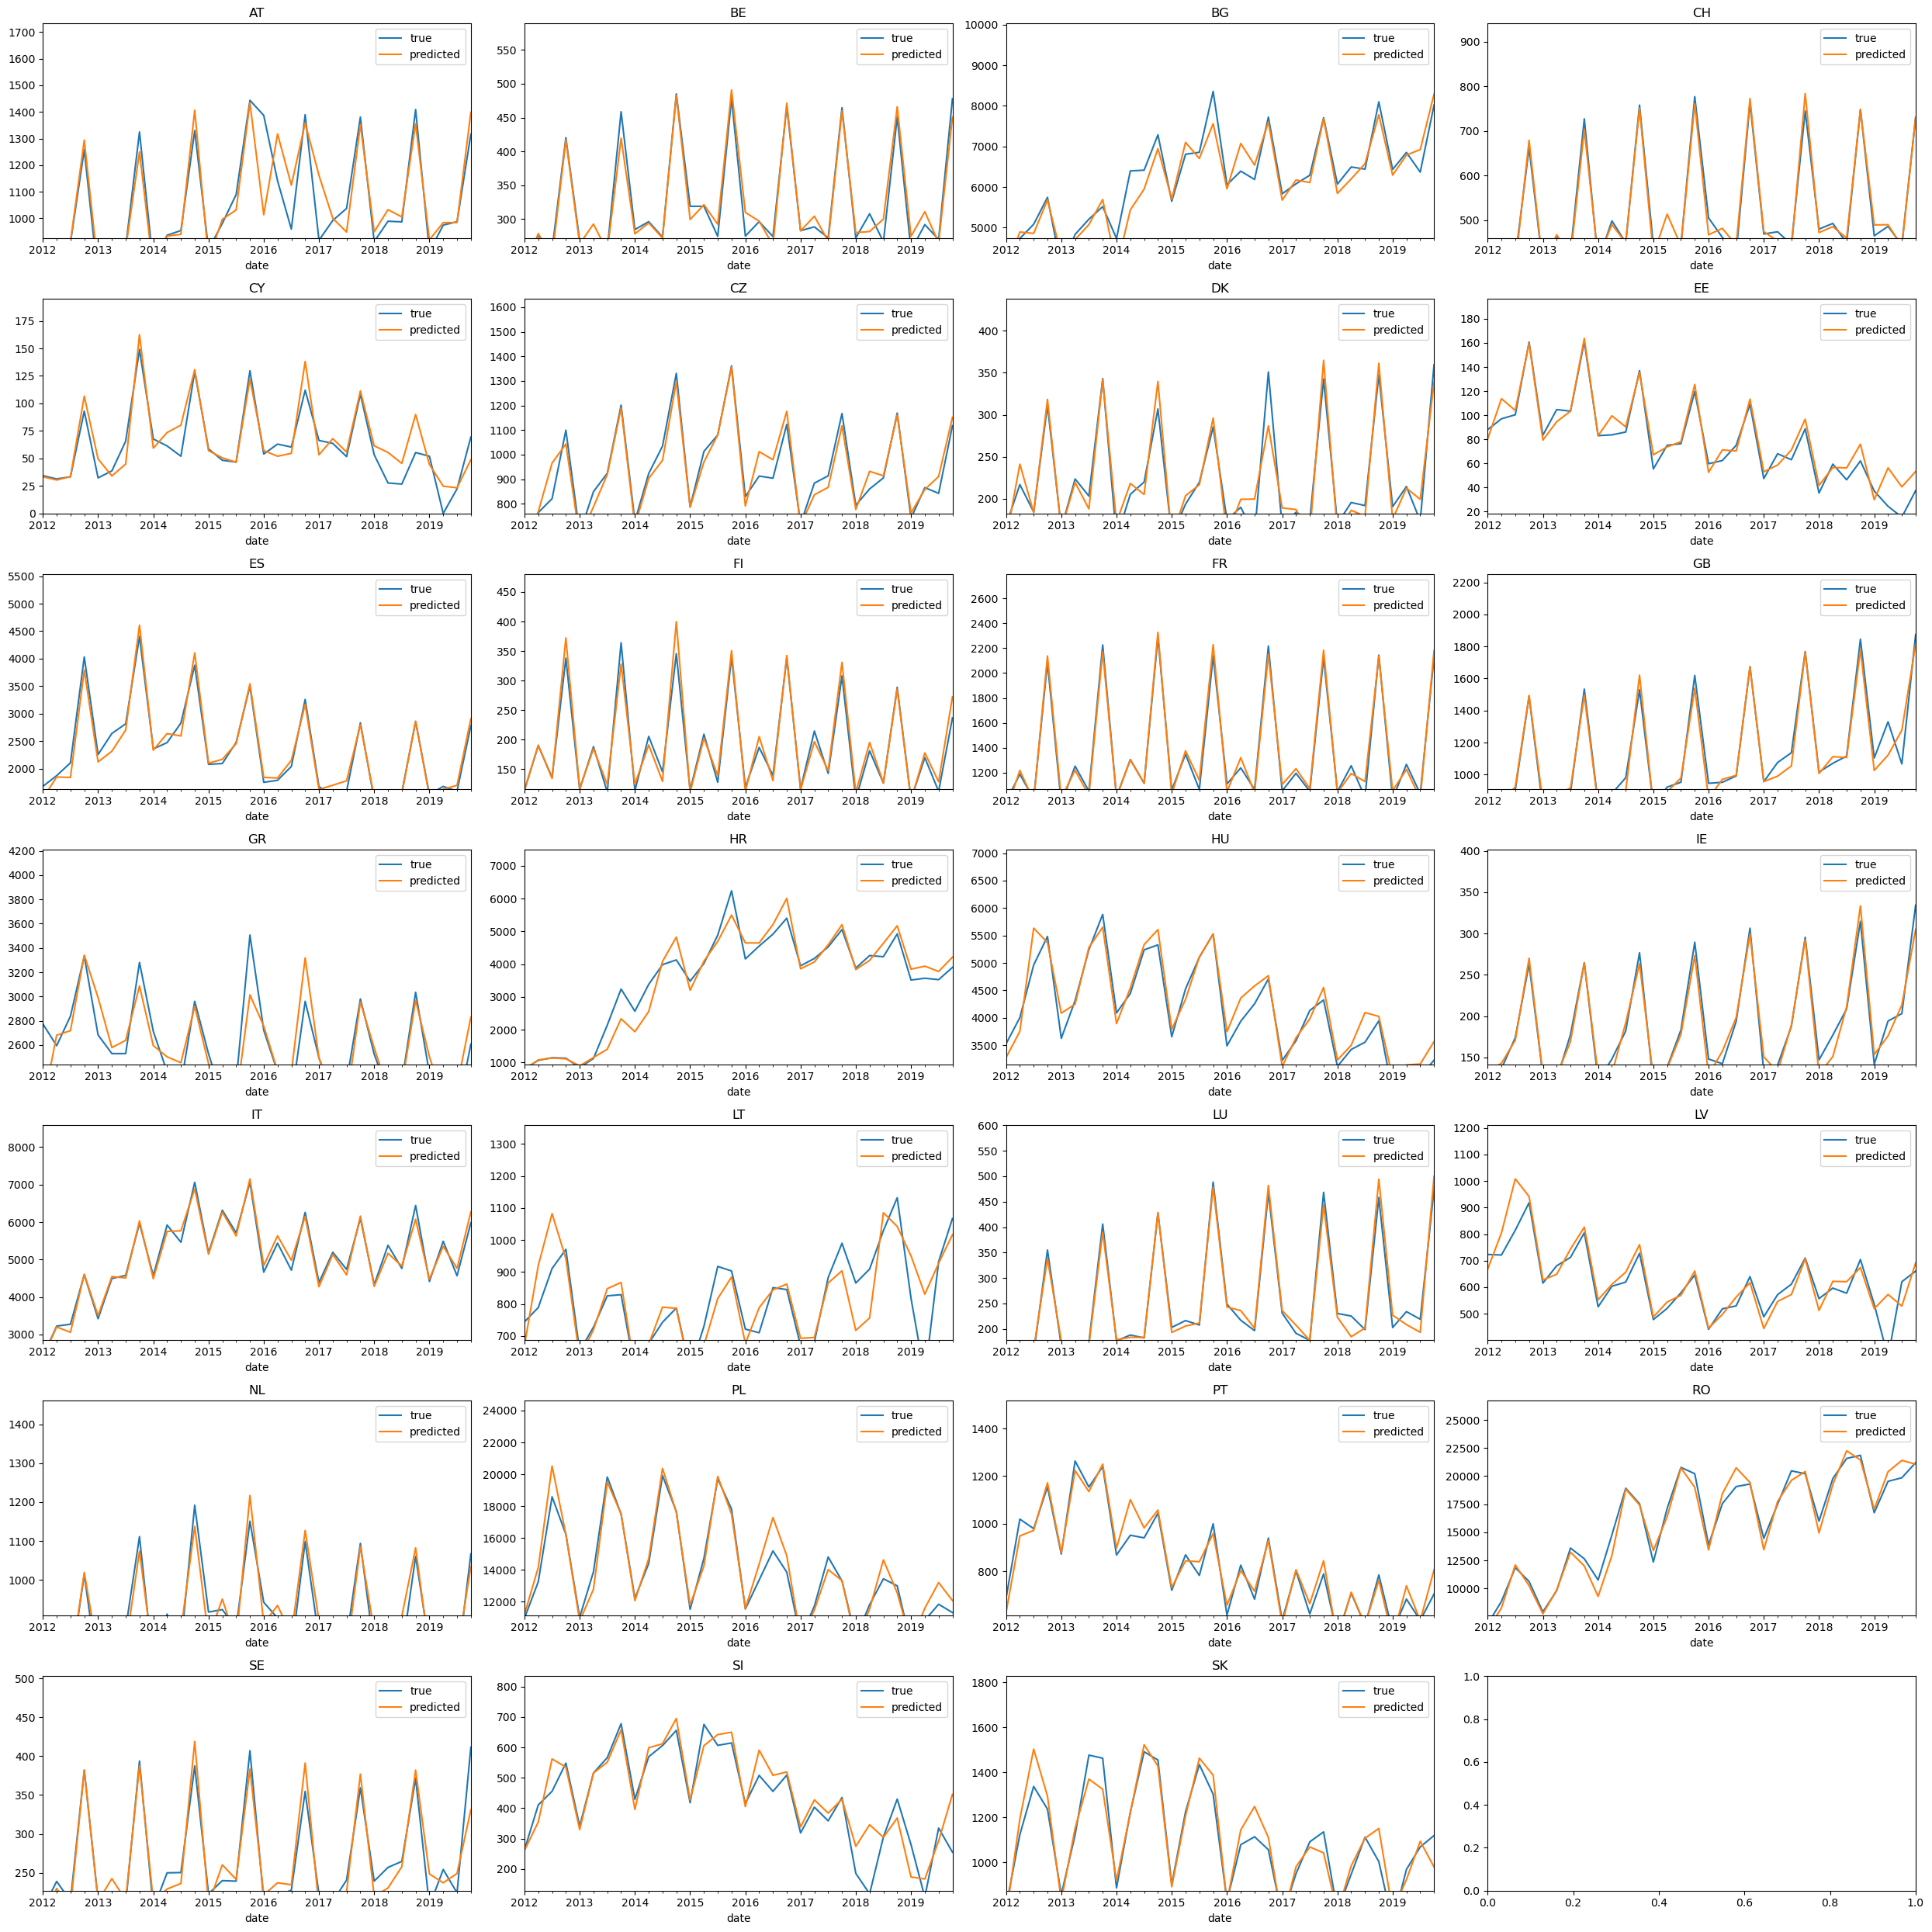

In [212]:
pred_arr = reg.predict(x_trans_stack[t_min:t_max])
y_pred_trans = pd.Series(pred_arr, index=y[t_min:t_max].stack().index).unstack()
y_pred = np.exp(y_pred_trans) * (y.shift(4) + 10) - 10

pred_arr_cv = model_selection.cross_val_predict(
    reg, x_trans_stack[t_min:t_split_lower], y_trans_stack[t_min:t_split_lower], cv=cv
)
y_pred_trans_cv = pd.Series(
    pred_arr_cv, index=y[t_min:t_split_lower].stack().index
).unstack()
y_pred_cv = np.exp(y_pred_trans_cv) * (y.shift(4) + 10) - 10

y_pred_trans_cv
# y_trans

fig, axs = eval.plot_prediction(y_pred[t_min:t_max], y[t_min:t_max])
plt.show()

